<a href="https://colab.research.google.com/github/Rya-Sanovar/Data-Mining-Techniques-to-predict-Depression-for-Mental-Health-Awareness/blob/main/Final_depressionnaivebayes_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Data Analysis**

In [ ]:
import os
from datetime import datetime 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

control_1 = pd.read_csv('/content/drive/MyDrive/data/control/control_1.csv')
condition_1 = pd.read_csv('/content/drive/MyDrive/data/condition/condition_1.csv')
print(f'control_1.shape: {control_1.shape}')
print(f'condition_1.shape: {condition_1.shape}')

control_1.shape: (51611, 3)
condition_1.shape: (23244, 3)


In [ ]:
control_1.head()

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293


In [ ]:
condition_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [ ]:
condition_1.describe()

,activity
count,23244.000000
mean,146.948030
std,294.592424
min,0.000000
25%,0.000000
50%,9.000000
75%,172.000000
max,3526.000000


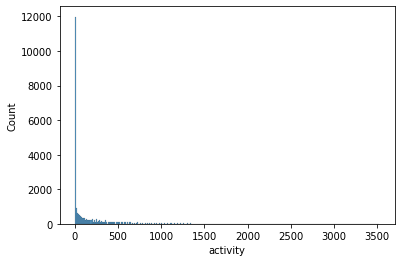

In [ ]:
sns.histplot(x='activity', data=condition_1)

In [ ]:
condition_1['activity'].skew()

3.8823677090908344

From the above graph, it can be seen that there is high level of skewness, An alternative is taking the log or square root of activity

In [ ]:
condition_1['log_activity'] = np.log(condition_1['activity'] + 1) # add + 1 because log(0) is infinity
condition_1['log_activity'].skew()

0.2771381485812395

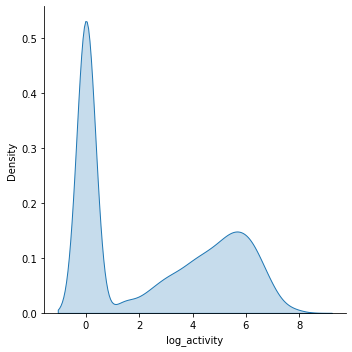

In [ ]:
sns.displot(x='log_activity', data=condition_1, kind='kde', fill=True)

In [ ]:
condition_1['sqrt_activity'] = np.sqrt(condition_1['activity'])
condition_1['sqrt_activity'].skew()

1.370447546298057

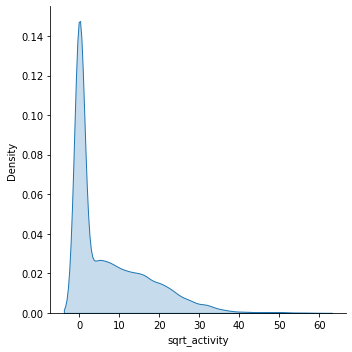

In [ ]:
sns.displot(x='sqrt_activity', data=condition_1, kind='kde', fill=True)

In [ ]:
condition_1.describe()

,activity,log_activity,sqrt_activity
count,23244.000000,23244.000000,23244.000000
mean,146.948030,2.562035,7.416512
std,294.592424,2.626393,9.588917
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,9.000000,2.302585,3.000000
75%,172.000000,5.153292,13.114877
max,3526.000000,8.168203,59.380131


In [ ]:
control_1['activity'].skew()

5.039169993104665

In [ ]:
control_1.describe()

,activity
count,51611.000000
mean,98.545078
std,289.655317
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,6117.000000


In [ ]:
control_1['log_activity'] = np.log(control_1['activity'] + 1)
control_1['log_activity'].skew()

1.2517081703386566

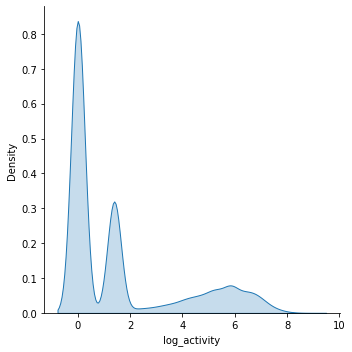

In [ ]:
sns.displot(x='log_activity', data=control_1, kind='kde', fill=True)

In [ ]:
condition_1.head()

,timestamp,date,activity,log_activity,sqrt_activity
0,2003-05-07 12:00:00,2003-05-07,0,0.000000,0.000000
1,2003-05-07 12:01:00,2003-05-07,143,4.969813,11.958261
2,2003-05-07 12:02:00,2003-05-07,0,0.000000,0.000000
3,2003-05-07 12:03:00,2003-05-07,20,3.044522,4.472136
4,2003-05-07 12:04:00,2003-05-07,166,5.117994,12.884099


In [ ]:
df = condition_1.groupby('date')['log_activity'].mean().reset_index()
df.head()

,date,log_activity
0,2003-05-07,3.752204
1,2003-05-08,2.931977
2,2003-05-09,2.593095
3,2003-05-10,2.910573
4,2003-05-11,2.561446


In [ ]:
import pandas as pd
import io
from google.colab import files
  
  
uploaded = files.upload()

Saving scores.csv to scores (3).csv


In [ ]:
scores = pd.read_csv(io.BytesIO(uploaded['scores.csv']))

In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [ ]:
scores.shape

(55, 12)

In [ ]:
scores.isnull().values.any()

True

In [ ]:
scores.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [ ]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
days,55.0,12.600000,2.491467,5.0,13.0,13.0,13.0,20.0
gender,55.0,1.454545,0.502519,1.0,1.0,1.0,2.0,2.0
afftype,23.0,1.739130,0.540824,1.0,1.0,2.0,2.0,3.0
melanch,20.0,1.950000,0.223607,1.0,2.0,2.0,2.0,2.0
inpatient,23.0,1.782609,0.421741,1.0,2.0,2.0,2.0,2.0
marriage,23.0,1.521739,0.510754,1.0,1.0,2.0,2.0,2.0
work,23.0,1.869565,0.344350,1.0,2.0,2.0,2.0,2.0
madrs1,23.0,22.739130,4.797892,13.0,18.5,24.0,26.0,29.0
madrs2,23.0,20.000000,4.729021,11.0,16.0,21.0,24.5,28.0


# **Time Series Analysis**

In [ ]:
def combine_data(path):
    dirs = os.listdir(path)
    combine_df = []
    
    for filepath in dirs:
        source = filepath.split('.')[0]
        if filepath.endswith('.csv'):
            X = pd.read_csv(path + filepath, parse_dates=['timestamp'], index_col='timestamp')
            X['source'] = source
            combine_df.append(X)
        
    return combine_df

In [ ]:
combine_df = combine_data('/content/drive/MyDrive/data/condition/')

In [ ]:
conditions = []
for condition in combine_df:
    condition_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    condition_df['mean_activity'] = condition.activity.resample('H').mean()
    condition_df['std_activity'] = condition.activity.resample('H').std()
    condition_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in condition.activity.resample('H')]
    condition_df['source'] = condition.source
    conditions.append(condition_df)

In [ ]:
combine_df = combine_data('/content/drive/MyDrive/data/control/')

In [ ]:
controls = []
for control in combine_df:
    control_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    control_df['mean_activity'] = control.activity.resample('H').mean()
    control_df['std_activity'] = control.activity.resample('H').std()
    control_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in control.activity.resample('H')]
    control_df['source'] = control.source
    controls.append(control_df)

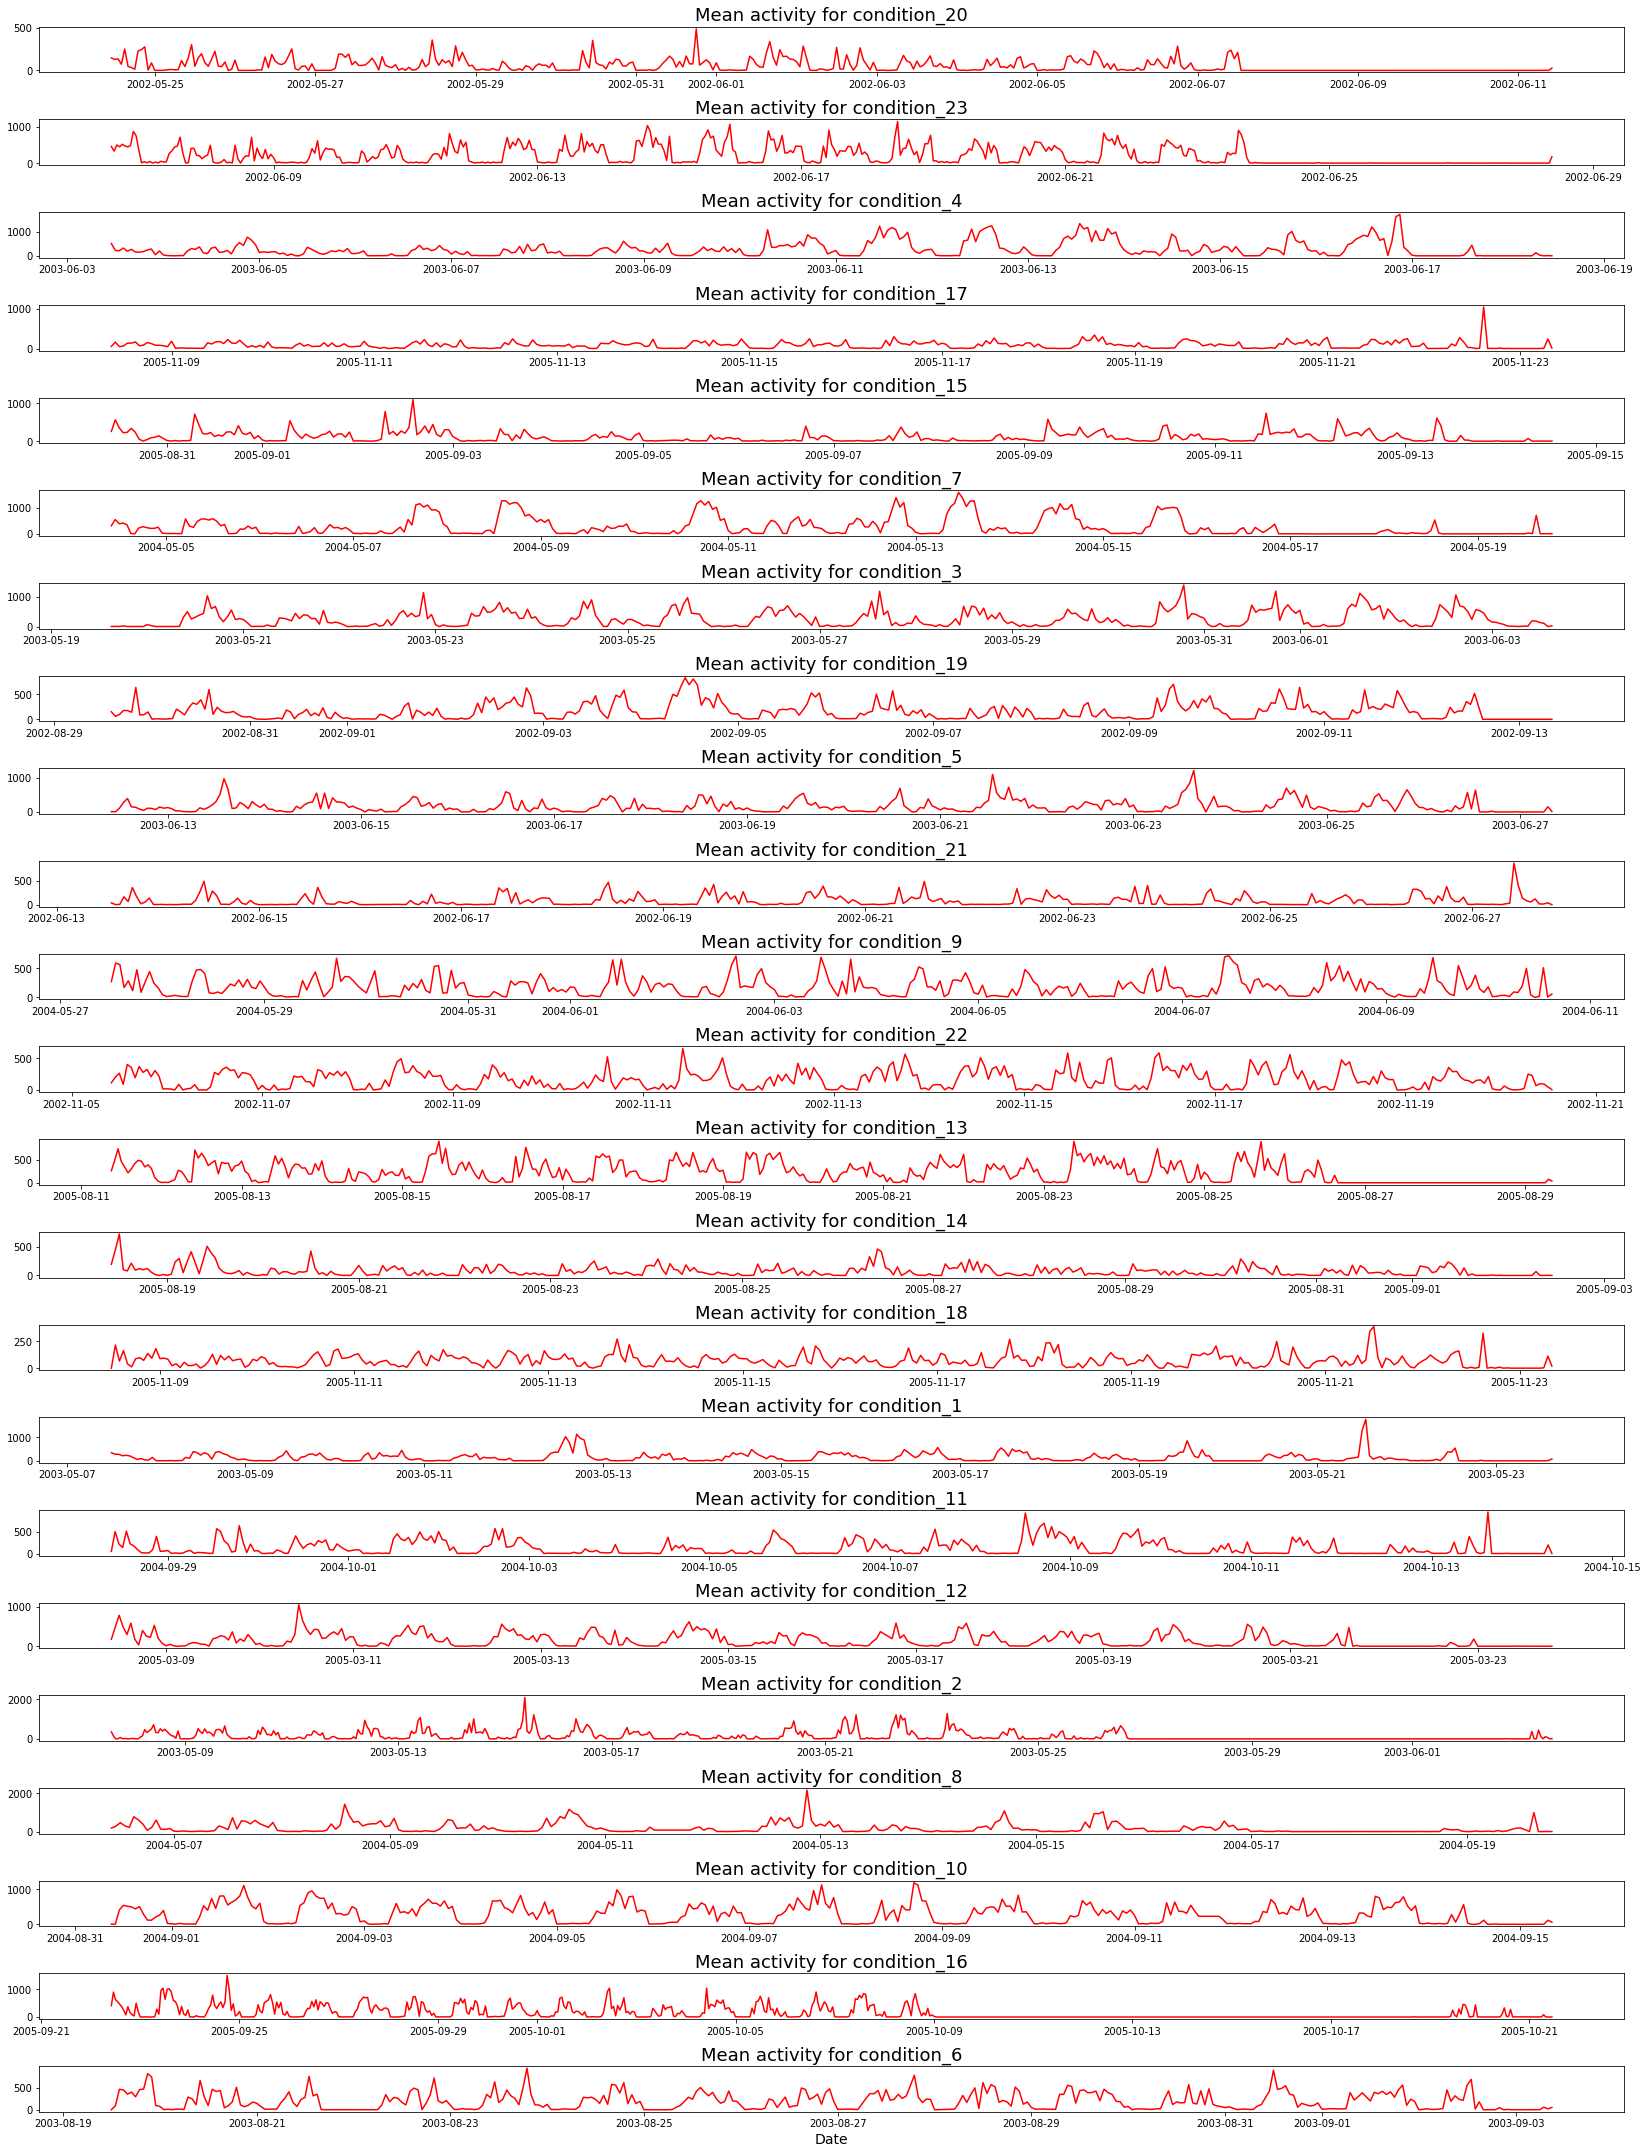

In [ ]:
fig, axes = plt.subplots(23, 1, figsize=(23, 30))
cnt = 0
for i in range(23):
    condition = conditions[cnt]
    axes[i].plot(condition.index, condition.mean_activity, color='r')
    axes[i].set_title(f'Mean activity for {condition.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of condition group.jpg', dpi=100)
plt.show()

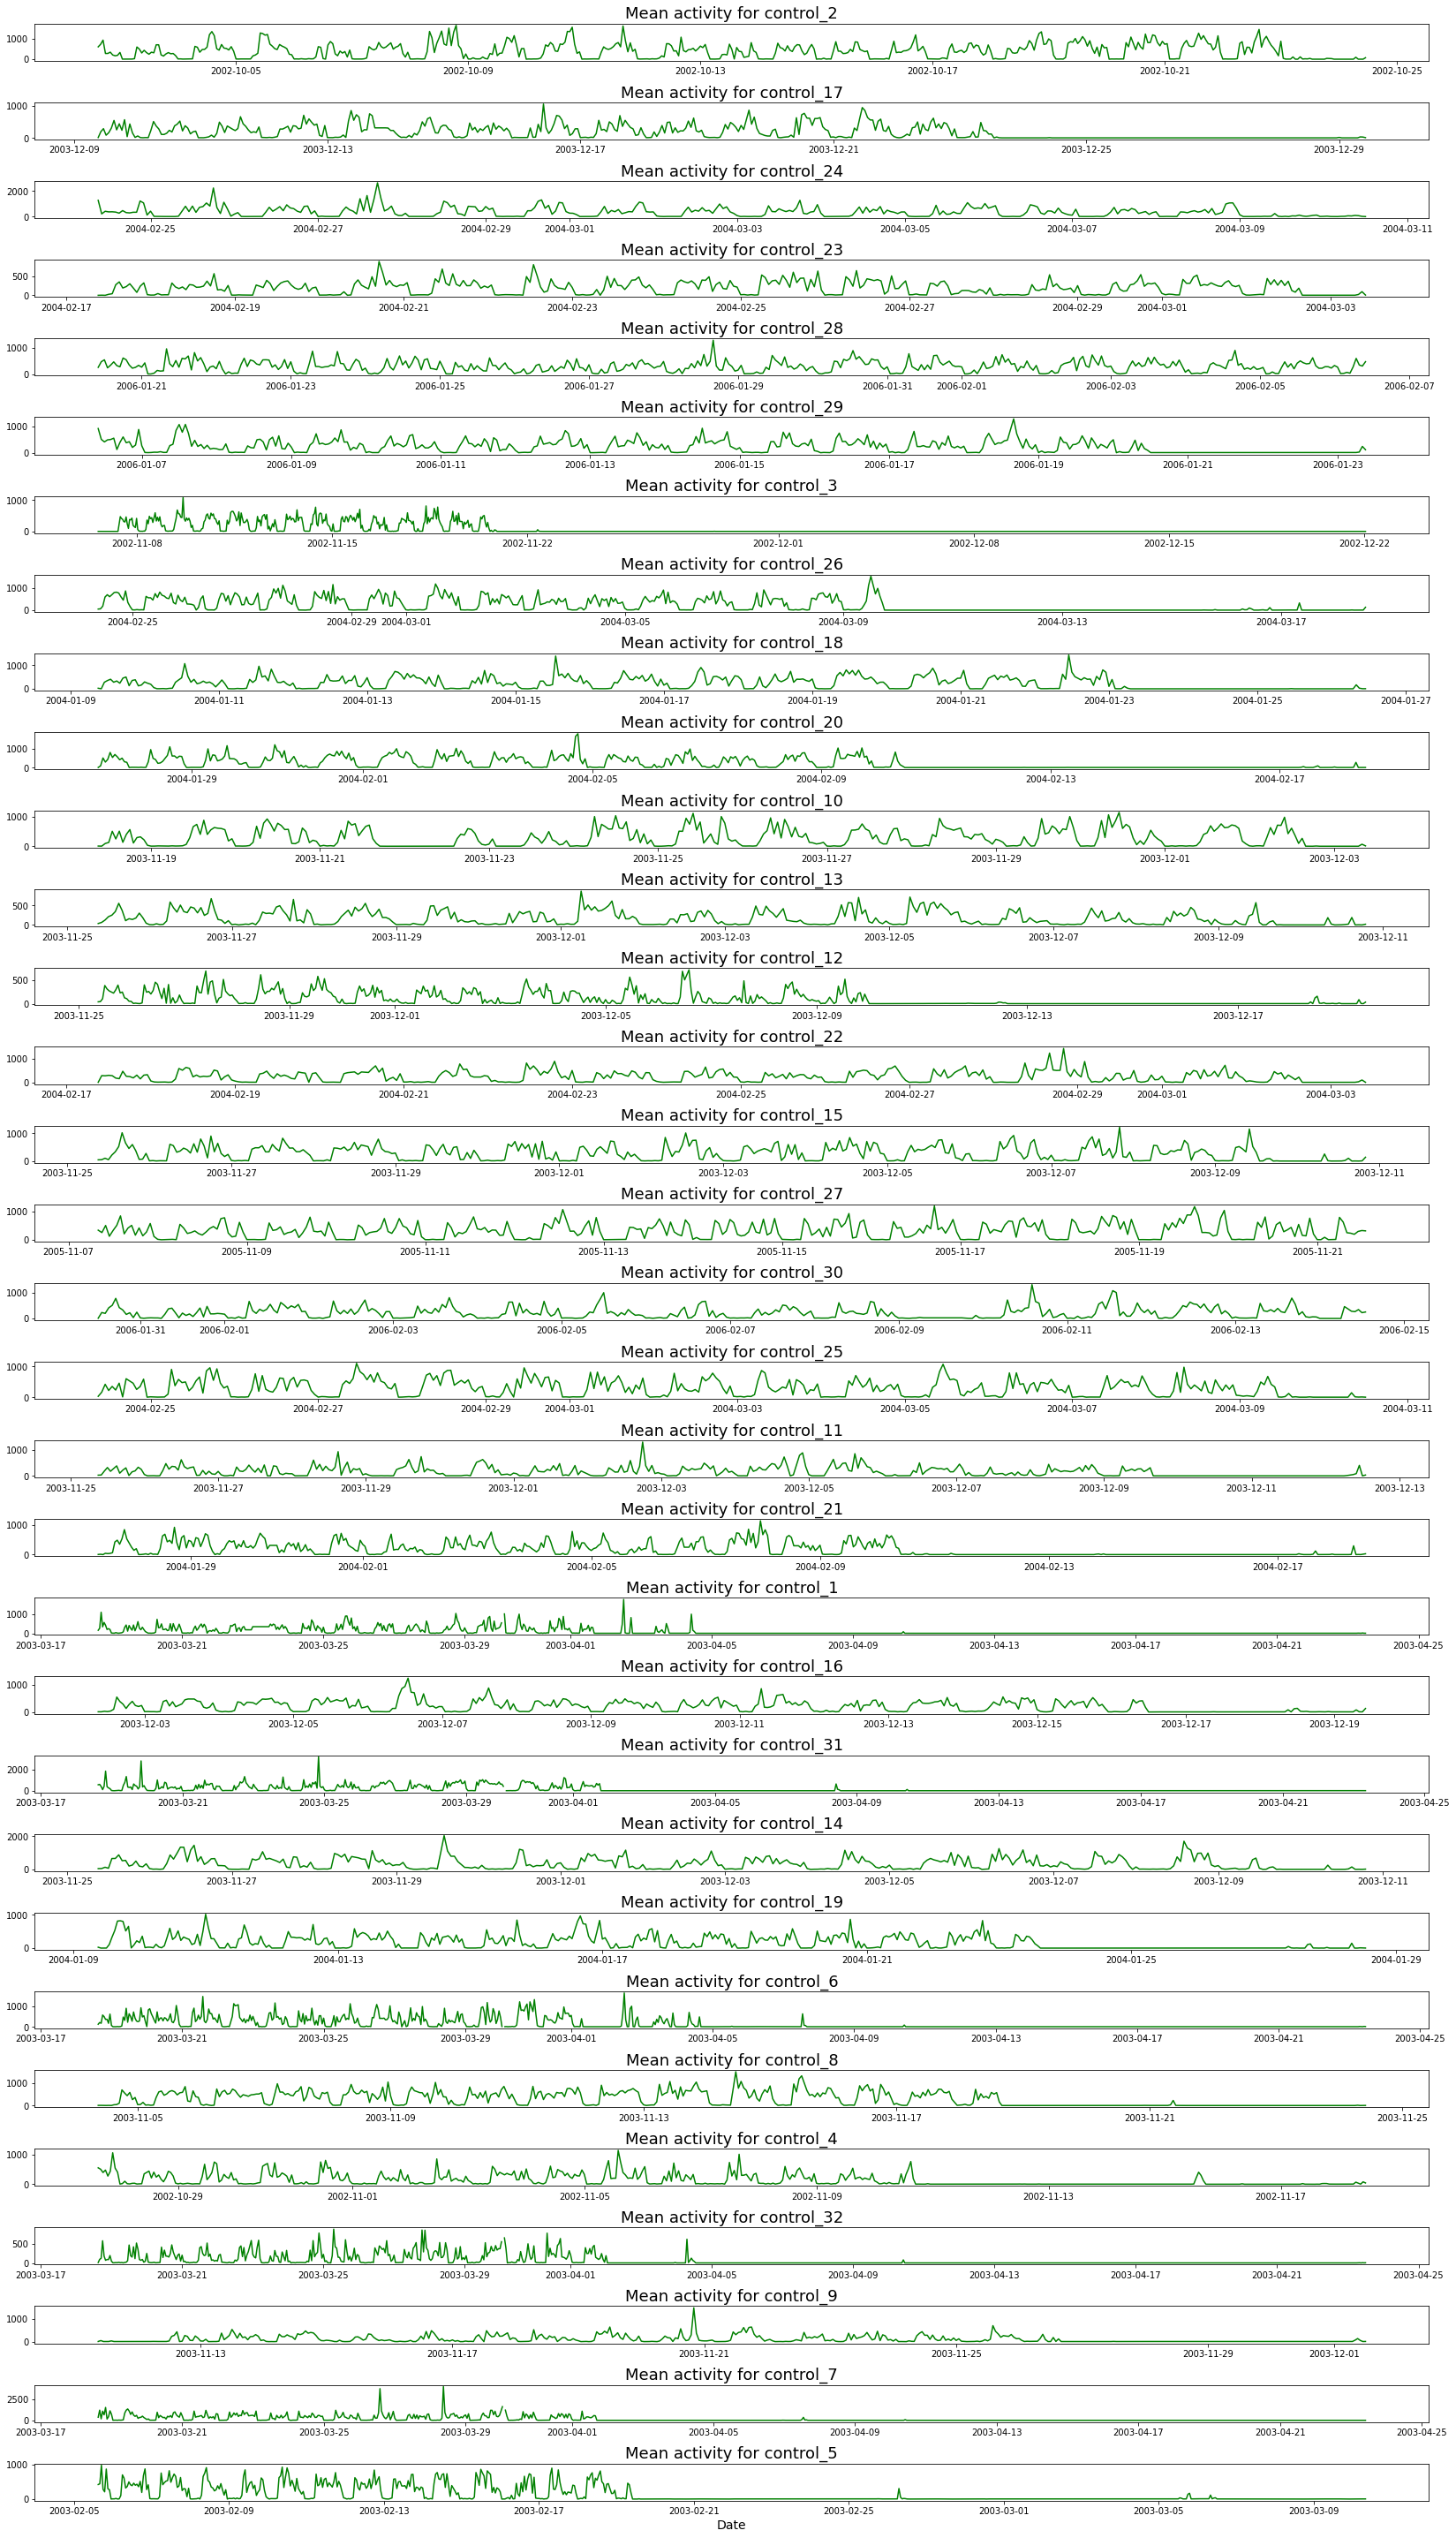

In [ ]:
fig, axes = plt.subplots(32, 1, figsize=(23, 40))
cnt = 0
for i in range(32):
    control = controls[cnt]
    axes[i].plot(control.index, control.mean_activity, color='g')
    axes[i].set_title(f'Mean activity for {control.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of control group.jpg', dpi=100)
plt.show()

In [ ]:
def to_clock(x):
    d = datetime.strptime(f'{x}:00', '%H:%M')
    return d.strftime('%I:%M %p')

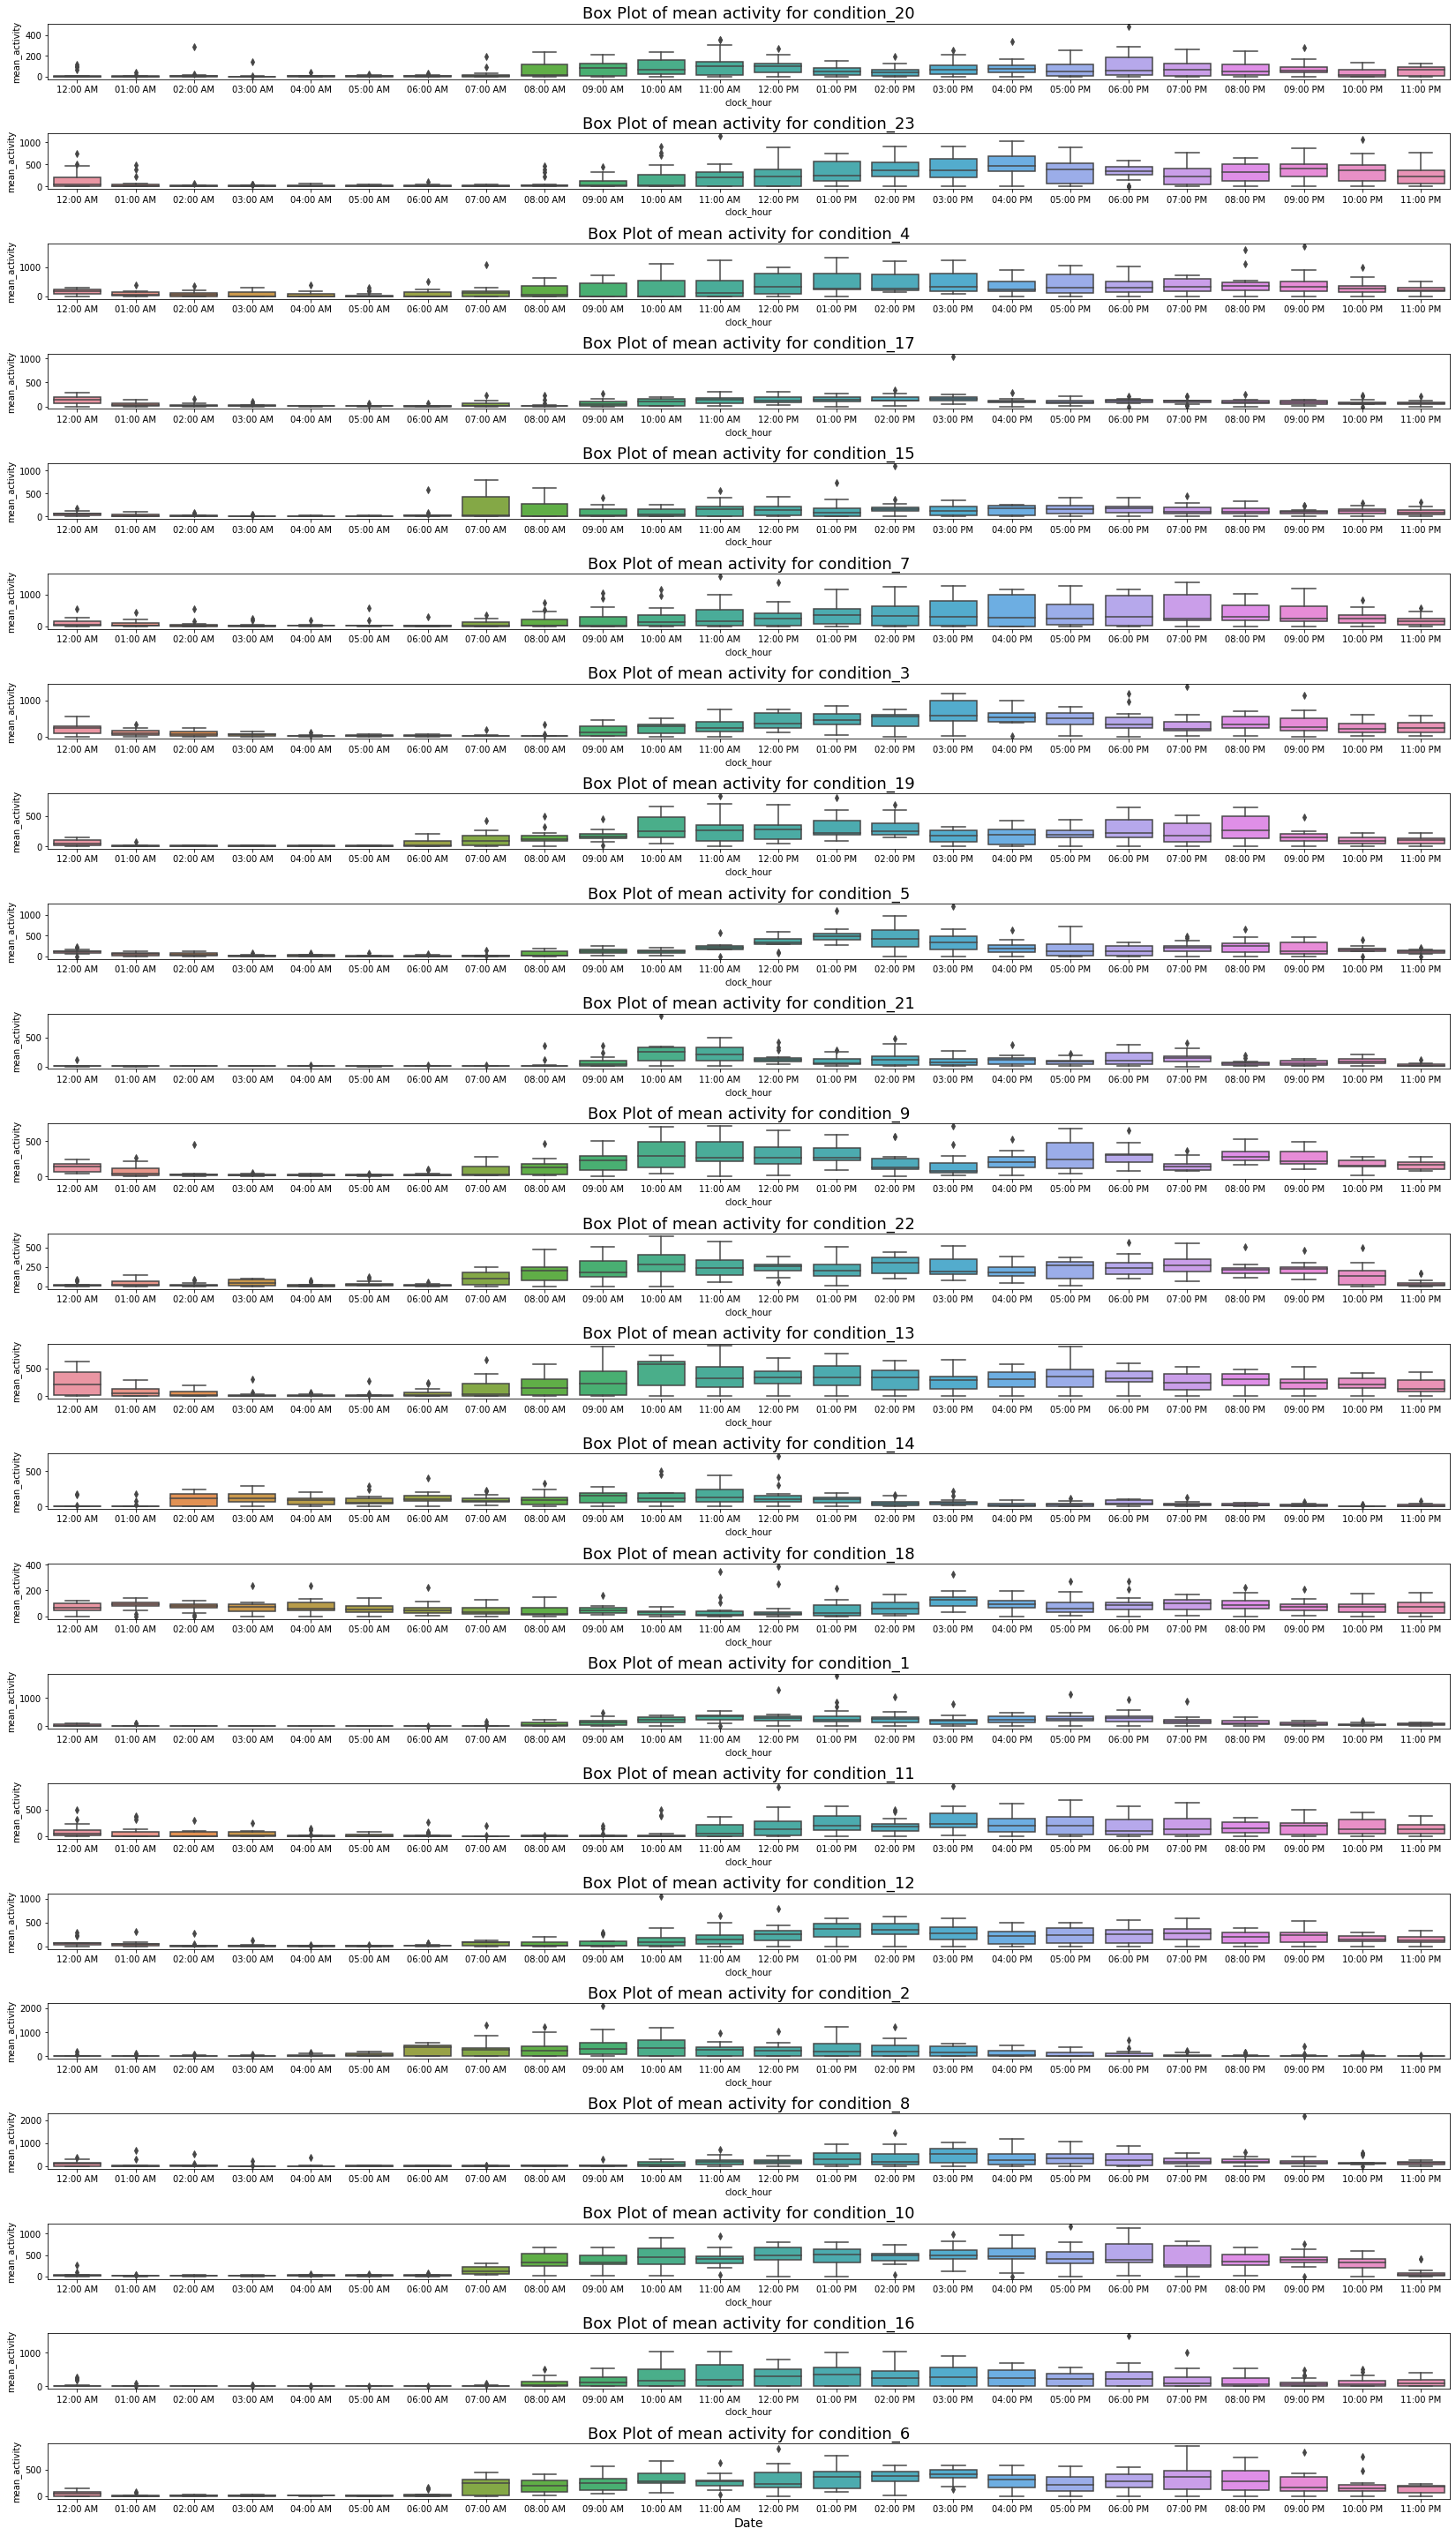

In [ ]:
# Draw Plot
fig, axes = plt.subplots(23, 1, figsize=(23, 40))

cnt = 0
for i in range(23):
    df = conditions[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()

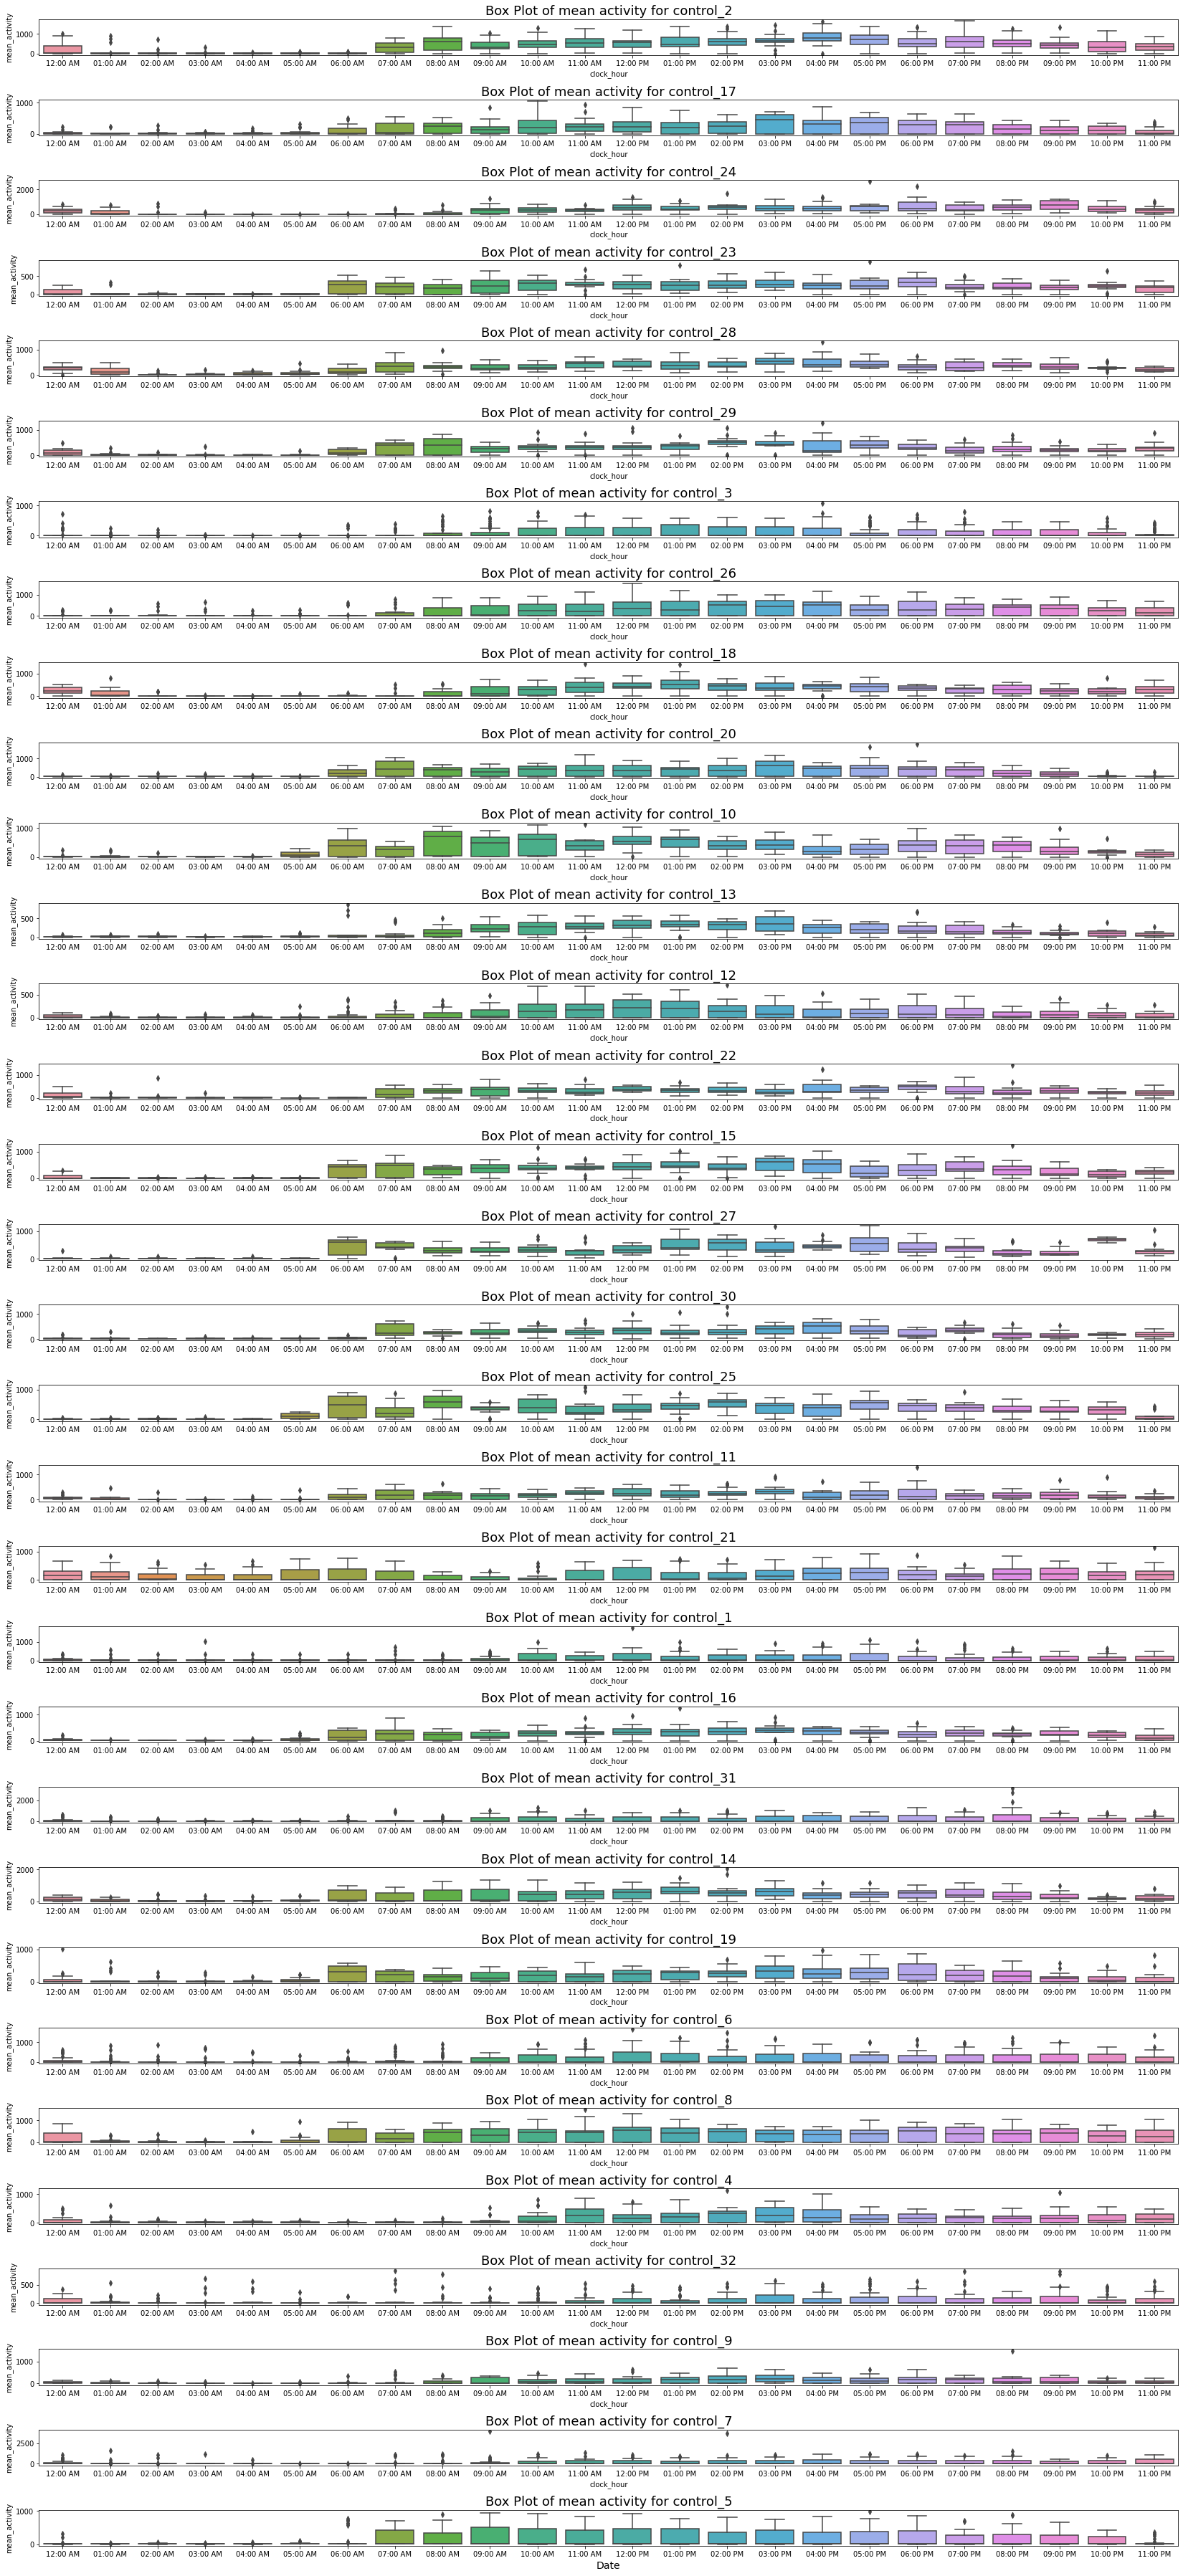

In [ ]:
# Draw Plot
fig, axes = plt.subplots(32, 1, figsize=(23, 50))

cnt = 0
for i in range(32):
    df = controls[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()

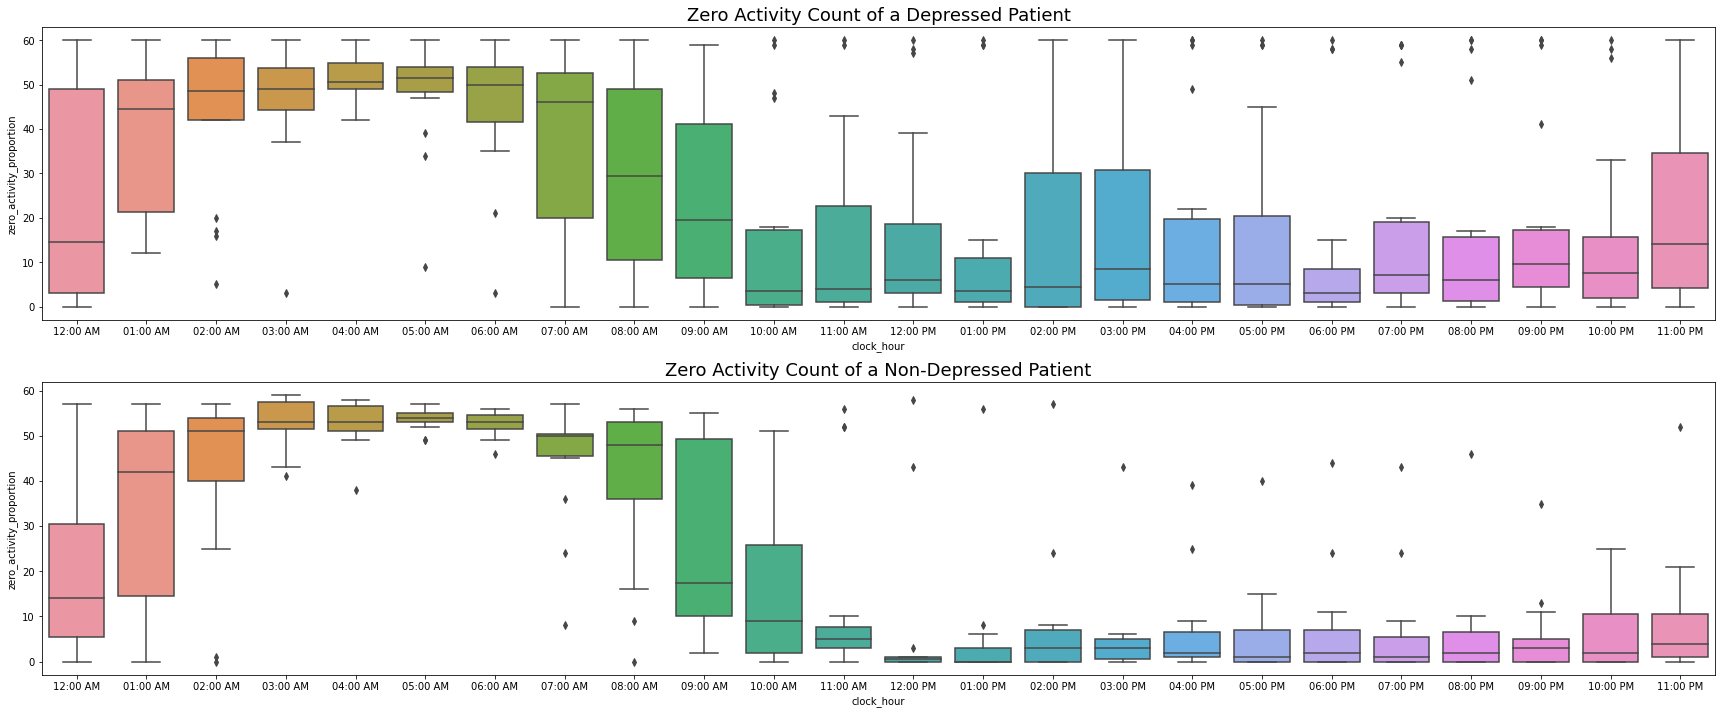

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(24, 10))
df = conditions[12].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[0])
axes[0].set_title('Zero Activity Count of a Depressed Patient', fontsize=18)

df = controls[2].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[1])
axes[1].set_title('Zero Activity Count of a Non-Depressed Patient', fontsize=18)

fig.tight_layout(pad=1.0)
plt.show()

In [ ]:
## Clustering Analysis

# **Naive Bayes Classifier**

In [ ]:
def nextday(dates):
    for date in dates:
        yield date

In [ ]:
def zero_count(series):
    return list(series).count(0)

In [ ]:
def extractfeatures(X, date):
    mask = X['date'] == date
    d = {
        'mean_log_activity': X[mask]['log_activity'].mean(),
        'std_log_activity': X[mask]['log_activity'].std(),
        'min_log_activity': X[mask]['log_activity'].min(),
        'max_log_activity': X[mask]['log_activity'].max(),
        'zero_proportion_activity': zero_count(X[mask]['log_activity'])
    }
    return d

In [ ]:
class ExtractData(BaseEstimator, TransformerMixin):
    
    def __init__(self, path):
        self.path = path
        self.X = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        dirs = os.listdir(self.path)
        
        for filepath in sorted(dirs, key=lambda x: x.split('_')[0]):
            condition = filepath.split('.')[0]
            if filepath.endswith('.csv'):
                X = pd.read_csv(self.path + filepath)
                X['log_activity'] = np.log(X['activity'] + 1)
                dates = X.date.unique()
                
                for date in nextday(dates):
                    d = extractfeatures(X, date)
                    d['source'] = condition
                    self.X.append(d)

        return pd.DataFrame(self.X)

In [ ]:
e = ExtractData(path='/content/drive/MyDrive/data/condition/')
conditions = e.fit_transform(X=None, y=None)
conditions['state'] = 1

In [ ]:
conditions.tail()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
400,2.383962,2.659121,0.0,8.047190,733,condition_6,1
401,2.890593,2.745717,0.0,7.580189,602,condition_6,1
402,3.400727,2.788079,0.0,8.047190,529,condition_6,1
403,1.669743,2.590492,0.0,7.767264,989,condition_6,1
404,0.228577,1.027840,0.0,6.502790,523,condition_6,1


In [ ]:
e = ExtractData(path='/content/drive/MyDrive/data/control/')
controls = e.fit_transform(X=None, y=None)
controls['state'] = 0

In [ ]:
scores = pd.read_csv('/content/drive/MyDrive/data/scores.csv')
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [ ]:
full_df = controls.append(conditions, ignore_index=True)
full_df.head()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
0,5.110954,1.875912,0.0,7.696213,39,control_2,0
1,3.835874,2.660859,0.0,7.664816,425,control_2,0
2,4.347506,2.851807,0.0,8.131531,397,control_2,0
3,3.914182,3.018889,0.0,8.038512,488,control_2,0
4,2.911614,2.871559,0.0,7.883069,657,control_2,0


In [ ]:
full_df.shape

(1144, 7)

Random Forest Classifier

In [ ]:
def custom_train_test_split(train_set, test_set):
    X_train = train_set.drop('label', axis=1)
    y_train = train_set.label
    X_test = test_set.drop('label', axis=1)
    y_test = test_set.label
    
    return X_train, X_test, y_train, y_test

In [ ]:
class CustomClassifierCV(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_clf):
        self.base_clf = base_clf
    
    def fit(self, X, y=None):
        X['label'] = y
        participants = X.source.unique()
        folds = []
        
        predictions = [] # predicted labels
        actuals = [] # actual labels
            
        for p in participants:
            folds.append(X[X['source'] == p])
        
        for i in range(len(folds)):   
            test_set = folds[i]
            train_fold = [elem for idx , elem in enumerate(folds) if idx != i]
            
            train_set = pd.concat(train_fold)
            X_train, X_test, y_train, y_test = custom_train_test_split(train_set.drop(['source'], axis=1), test_set.drop(['source'], axis=1))
            
            self.base_clf.fit(X_train, y_train)
            predictions.append(self.predict(X_test))
            actuals.append(test_set.label.iloc[0])
            
        self.score(predictions, actuals)
        
    def predict(self, X):
        predictions = self.base_clf.predict(X)
        ones = predictions.tolist().count(1)
        zeroes = predictions.tolist().count(0)
        
        return 1 if ones > zeroes else 0
    
    def score(self, predictions, actuals):
        print(classification_report(predictions, actuals))

In [ ]:
X = full_df.drop(['state'], axis=1)
y = full_df.state

In [ ]:
forest = RandomForestClassifier(n_estimators=100)
custom_clfCV= CustomClassifierCV(forest)
custom_clfCV.fit(X,y)

              precision    recall  f1-score   support

           0       0.91      0.66      0.76        44
           1       0.35      0.73      0.47        11

    accuracy                           0.67        55
   macro avg       0.63      0.69      0.62        55
weighted avg       0.79      0.67      0.70        55



**some basic EDA**

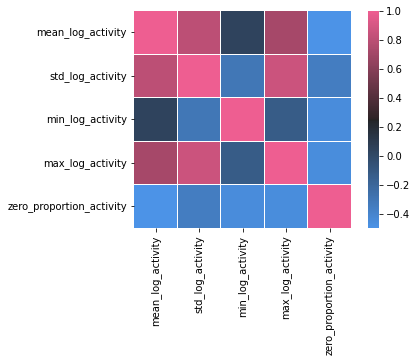

In [ ]:
corr = full_df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
full_df = full_df[["mean_log_activity", "std_log_activity", "min_log_activity", "state"]]
full_df.head()

,mean_log_activity,std_log_activity,min_log_activity,state
0,5.110954,1.875912,0.0,0
1,3.835874,2.660859,0.0,0
2,4.347506,2.851807,0.0,0
3,3.914182,3.018889,0.0,0
4,2.911614,2.871559,0.0,0


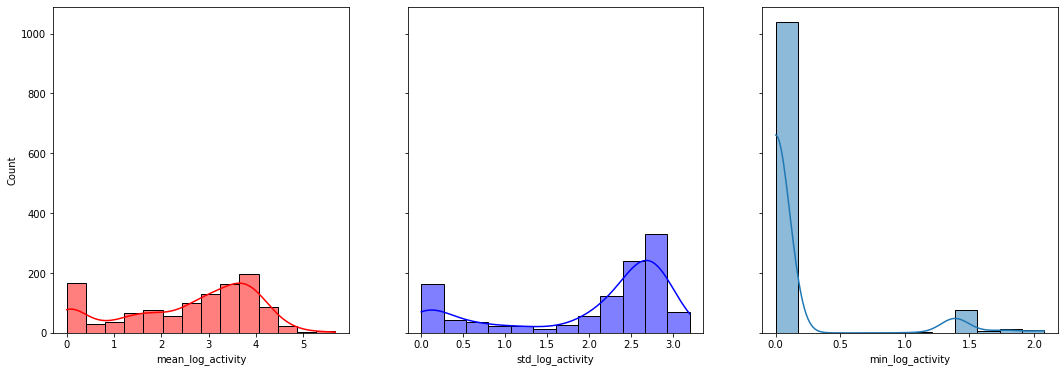

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(full_df, ax=axes[0], x="mean_log_activity", kde=True, color='r')
sns.histplot(full_df, ax=axes[1], x="std_log_activity", kde=True, color='b')
sns.histplot(full_df, ax=axes[2], x="min_log_activity", kde=True)

**Calculating prior probability P(Y=y) where y=0 for healthy patients and y=1 for depressed patients**

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior # this is a list of prior probabilities

**Approach 1: Calculating conditional probability P(X/y) using Gaussian distribution and the assumption that features are independent of eachother**

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label): #this function has to be called for each feature
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

**Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum**

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

**Testing this model**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(full_df, test_size=.2)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="state")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[132  21]
 [ 45  31]]
0.48437500000000006


# **Using the scores file to predict MADRS score after measurements**

Basic Data Preprocessing

In [ ]:
scores = pd.read_csv('/content/drive/MyDrive/data/scores.csv')
scores = scores[scores.number.str.startswith("condition")]
scores = scores.fillna(0)
scores['edu'] = scores['edu'].apply(lambda x: 0 if x == ' ' else x)
#find average age
agl = []
sum = 0
for a in scores["age"]:
  agl = str(a).split("-")
  length = len(agl)
  for i in range(length):
    sum = sum + float(agl[i])
  av = round (sum / length)
  sum = 0
  scores.age[scores.age == a] = av

scores.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,37,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,42,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,47,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,27,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,52,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [ ]:
#find average education years
edul = []
sum = 0
for e in scores["edu"]:
  edul = str(e).split("-")
  length = len(edul)
  for i in range(length):
    sum = sum + int(edul[i])
  ave = round (sum / length)
  sum = 0
  scores.edu[scores.edu == e] = ave

scores.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,37,2.0,2.0,2.0,8,1.0,2.0,19.0,19.0
1,condition_2,18,2,42,1.0,2.0,2.0,8,2.0,2.0,24.0,11.0
2,condition_3,13,1,47,2.0,2.0,2.0,8,2.0,2.0,24.0,25.0
3,condition_4,13,2,27,2.0,2.0,2.0,13,1.0,1.0,20.0,16.0
4,condition_5,13,2,52,2.0,2.0,2.0,13,2.0,2.0,26.0,26.0


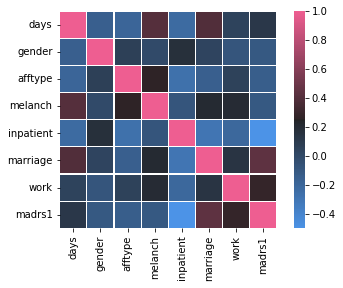

In [ ]:
#basic EDA
corr = scores.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
scores = scores[["gender", "age", "afftype", "melanch", "inpatient", "edu", "marriage", "work", "madrs1", "madrs2"]]
scores.head()

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,2,37,2.0,2.0,2.0,8,1.0,2.0,19.0,19.0
1,2,42,1.0,2.0,2.0,8,2.0,2.0,24.0,11.0
2,1,47,2.0,2.0,2.0,8,2.0,2.0,24.0,25.0
3,2,27,2.0,2.0,2.0,13,1.0,1.0,20.0,16.0
4,2,52,2.0,2.0,2.0,13,2.0,2.0,26.0,26.0



**Convert continuous features to categorical**

In [ ]:
scores["cat_age"] = pd.cut(scores["age"].values, bins = 3, labels = [0,1,2])
scores["cat_edu"] = pd.cut(scores["edu"].values, bins = 3, labels = [0,1,2])
scores["cat_madrs1"] = pd.cut(scores["madrs1"].values, bins = 2, labels = [0,1])
scores["cat_madrs2"] = pd.cut(scores["madrs2"].values, bins = 2, labels = [0,1])

scores = scores.drop(columns=["age", "edu"])
scores = scores[["gender",	"cat_age",	"afftype", "melanch", "inpatient", "cat_edu", "marriage", "work", "cat_madrs1", "cat_madrs2"]]
scores.head(10)

,gender,cat_age,afftype,melanch,inpatient,cat_edu,marriage,work,cat_madrs1,cat_madrs2
0,2,0,2.0,2.0,2.0,1,1.0,2.0,0,0
1,2,1,1.0,2.0,2.0,1,2.0,2.0,1,0
2,1,1,2.0,2.0,2.0,1,2.0,2.0,1,1
3,2,0,2.0,2.0,2.0,2,1.0,1.0,0,0
4,2,1,2.0,2.0,2.0,2,2.0,2.0,1,1
5,1,0,2.0,2.0,2.0,1,1.0,2.0,0,0
6,1,0,1.0,0.0,2.0,2,2.0,1.0,1,1
7,2,0,2.0,0.0,2.0,2,1.0,2.0,0,0
8,2,1,1.0,0.0,2.0,1,1.0,2.0,1,1
9,2,1,2.0,2.0,2.0,1,1.0,2.0,1,1


**Calculate P(Y=y) for all possible y**

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

**Calculate P(X=x|Y=y) categorically**

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y



**Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum**

In [ ]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

**Test the model...**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scores, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="cat_madrs2")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[3 0]
 [1 1]]
0.6666666666666666


DATA VISUALISATION 

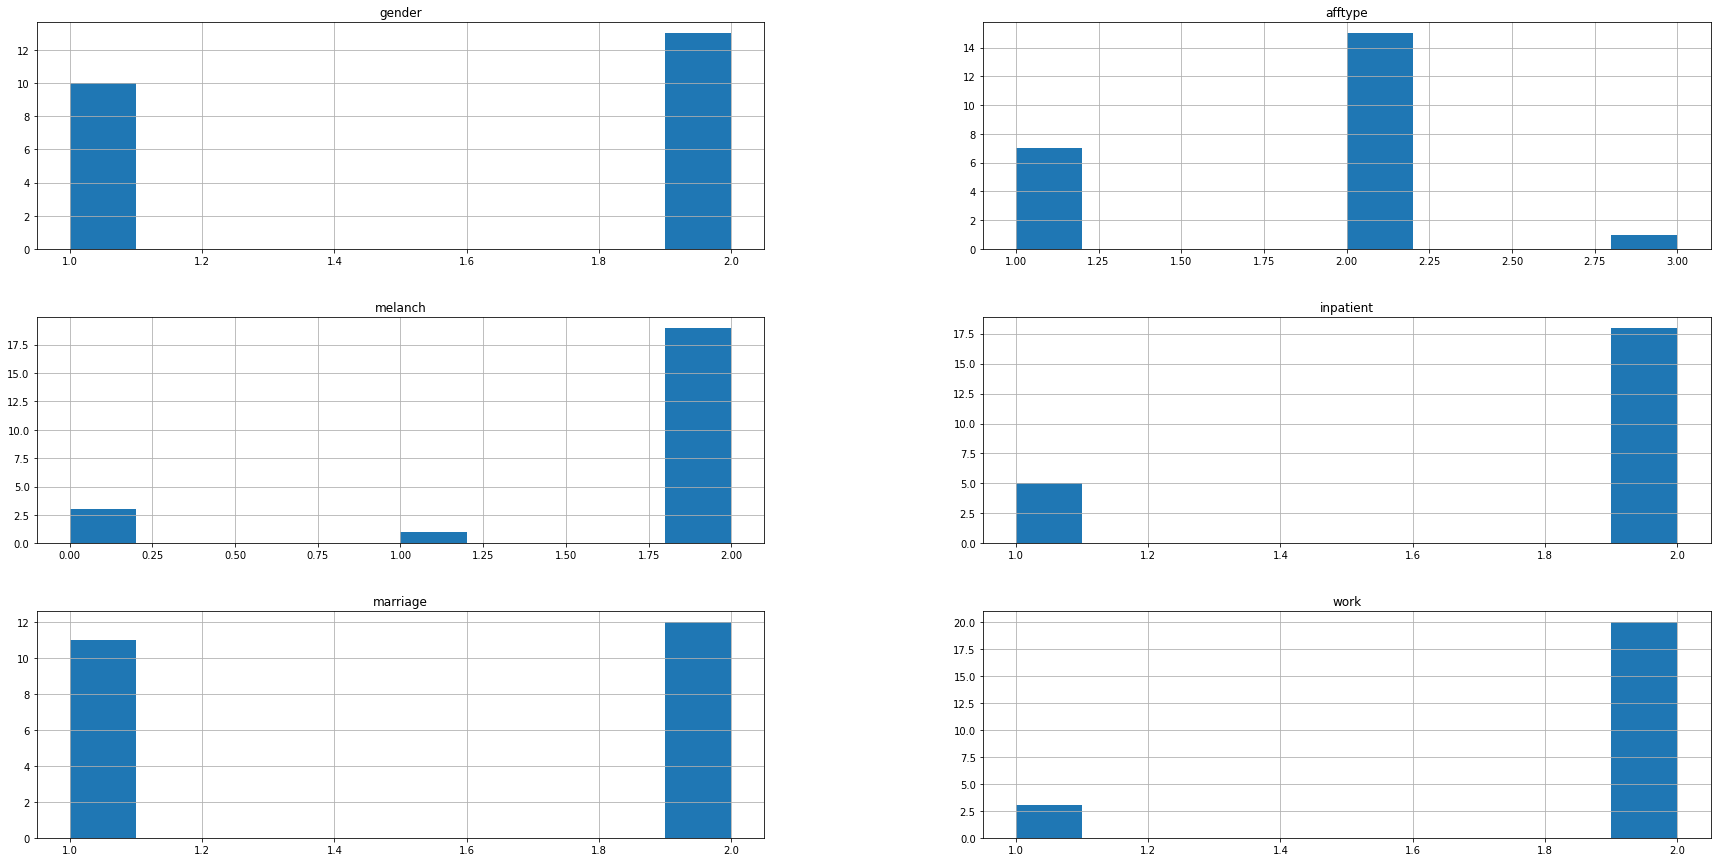

In [ ]:
scores.hist(figsize = (30,15))
plt.show()

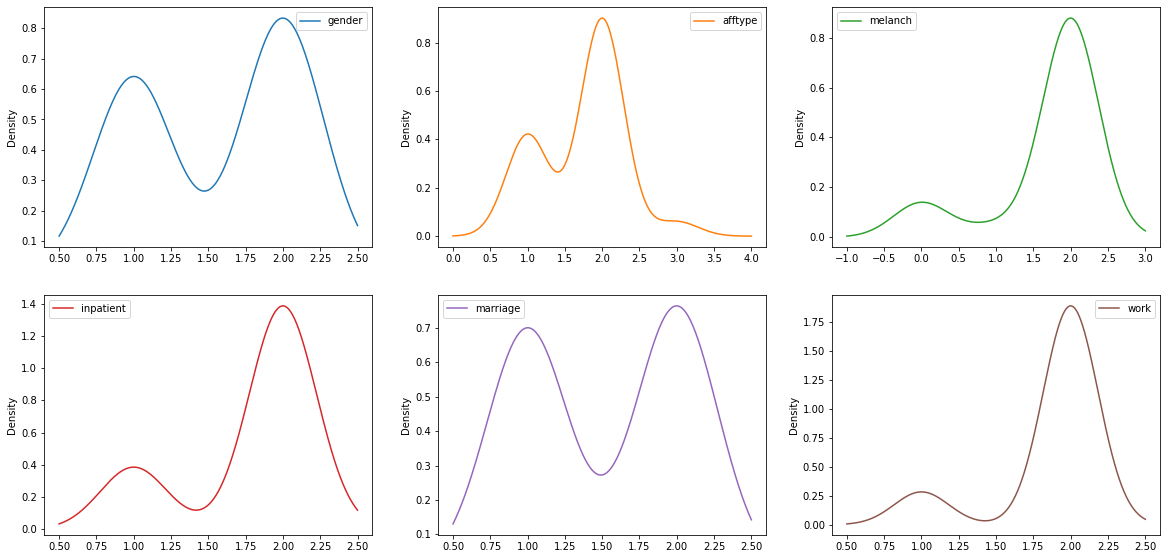

In [ ]:
scores.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

In [ ]:
import pandas as pd
import io
from google.colab import files
  
  
uploaded = files.upload()

Saving scores.csv to scores (4).csv


In [ ]:
scores = pd.read_csv(io.BytesIO(uploaded['scores.csv']))

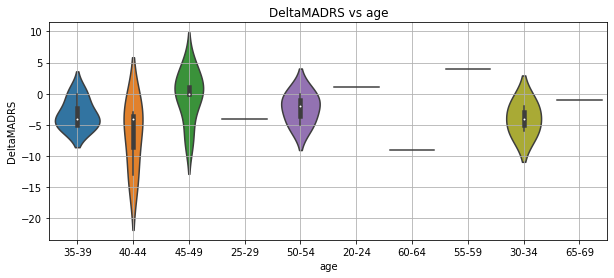

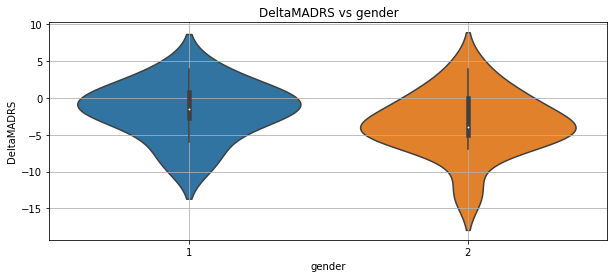

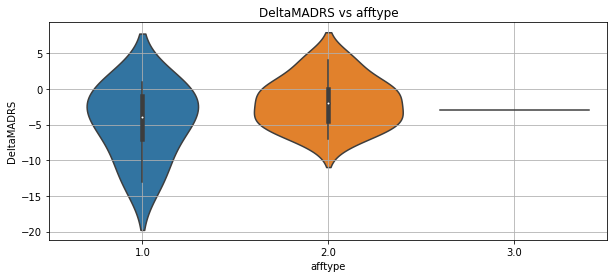

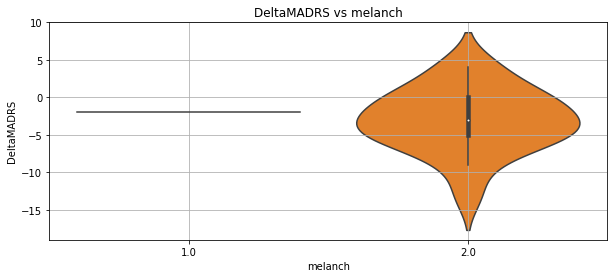

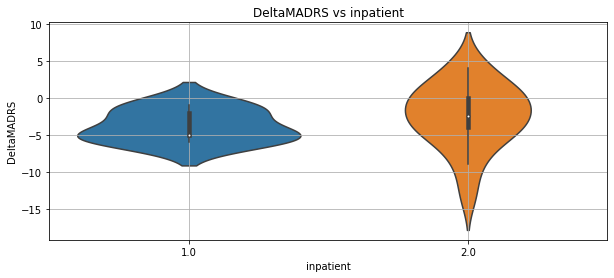

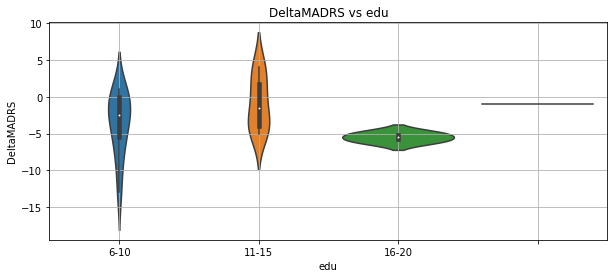

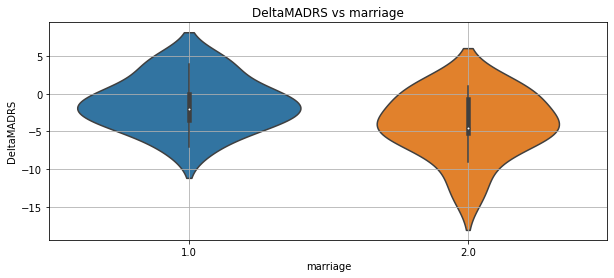

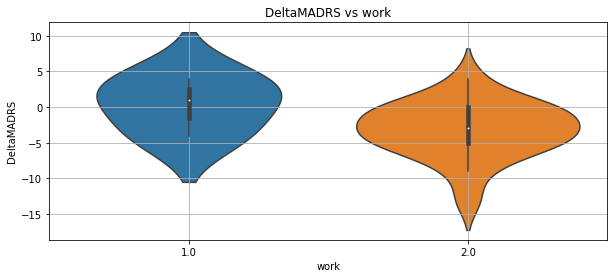

In [ ]:
scores['DeltaMADRS'] = scores.madrs2 - scores.madrs1
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']
df_condition = scores[scores.number.str.contains('condition')].copy()
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='DeltaMADRS')
    plt.title('DeltaMADRS vs ' + f)
    plt.grid()
    plt.show()


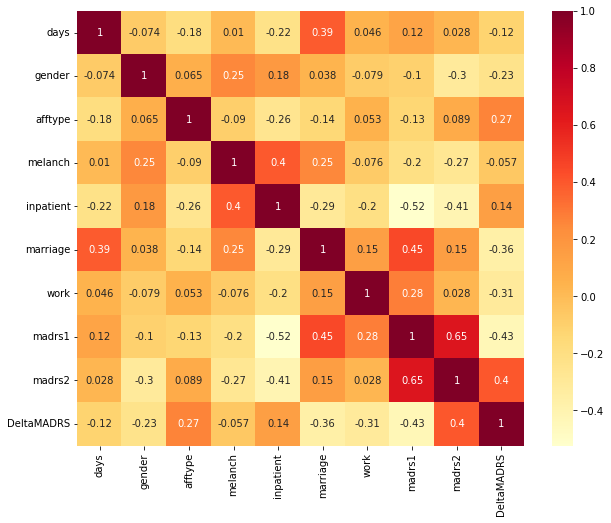

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(scores.corr(),annot=True,cmap='YlOrRd')
plt.show()

In [ ]:
scores = scores[scores.number.str.startswith("condition")]
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0


In [ ]:
import os
sum_dict = {}

for file in os.listdir("/content/drive/MyDrive/data/condition"):
    df = pd.read_csv('/content/drive/MyDrive/data/condition/' + file)
    sum_dict[file.split(".")[0]] = df.activity.sum()
sum_dict

{'condition_1': 3415660,
 'condition_10': 6243346,
 'condition_11': 2974516,
 'condition_12': 3354049,
 'condition_13': 5735146,
 'condition_14': 1624530,
 'condition_15': 2391019,
 'condition_16': 6128175,
 'condition_17': 1848268,
 'condition_18': 1517859,
 'condition_19': 3338367,
 'condition_2': 5981554,
 'condition_20': 1413779,
 'condition_21': 1628308,
 'condition_22': 3521753,
 'condition_23': 6379462,
 'condition_3': 5743208,
 'condition_4': 5925033,
 'condition_5': 3594618,
 'condition_6': 4209793,
 'condition_7': 5805537,
 'condition_8': 3569050,
 'condition_9': 3632316}

In [ ]:
sums = pd.DataFrame(pd.Series(sum_dict))
sums.columns = ["Sum"]
sums

,Sum
condition_20,1413779
condition_23,6379462
condition_4,5925033
condition_17,1848268
condition_15,2391019
condition_7,5805537
condition_3,5743208
condition_19,3338367
condition_5,3594618
condition_21,1628308


In [ ]:
conditions = scores.set_index("number").join(sums).reset_index()

In [ ]:
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Sum
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,3415660
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0,5981554
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0,5743208
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0,5925033
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,3594618
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0,4209793
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0,5805537
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0,3569050
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,3632316
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0,6243346


In [ ]:
conditions.at[21, "edu"] = "6-10"
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Sum
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,3415660
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0,5981554
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0,5743208
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0,5925033
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,3594618
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0,4209793
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0,5805537
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0,3569050
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,3632316
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0,6243346


In [ ]:
conditions["Stress"] = conditions.Sum / conditions.days
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Sum,Stress
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,3415660,310514.545455
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0,5981554,332308.555556
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0,5743208,441785.230769
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0,5925033,455771.769231
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,3594618,276509.076923
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0,4209793,601399.000000
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0,5805537,527776.090909
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0,3569050,713810.000000
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,3632316,279408.923077
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0,6243346,693705.111111


In [ ]:
conditions.melanch.fillna(2.0, inplace = True)
conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Sum,Stress
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,3415660,310514.545455
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0,5981554,332308.555556
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0,5743208,441785.230769
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0,5925033,455771.769231
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,3594618,276509.076923
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0,4209793,601399.000000
6,condition_7,11,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0,1.0,5805537,527776.090909
7,condition_8,5,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0,-4.0,3569050,713810.000000
8,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,3632316,279408.923077
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0,6243346,693705.111111


In [ ]:
conditions = conditions.drop(columns = ["number", "Sum", "days"])
conditions

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Stress
0,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,310514.545455
1,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0,332308.555556
2,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0,441785.230769
3,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0,455771.769231
4,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,276509.076923
5,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0,601399.000000
6,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0,1.0,527776.090909
7,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0,-4.0,713810.000000
8,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,279408.923077
9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0,693705.111111


In [ ]:
list(conditions.columns)

['gender',
 'age',
 'afftype',
 'melanch',
 'inpatient',
 'edu',
 'marriage',
 'work',
 'madrs1',
 'madrs2',
 'DeltaMADRS',
 'Stress']

In [ ]:
categoricals = list(conditions.columns)[:-3]
categoricals

['gender',
 'age',
 'afftype',
 'melanch',
 'inpatient',
 'edu',
 'marriage',
 'work',
 'madrs1']

In [ ]:
categoricals = list(conditions.columns)[:-3]
categoricals

['gender',
 'age',
 'afftype',
 'melanch',
 'inpatient',
 'edu',
 'marriage',
 'work',
 'madrs1']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(conditions.Stress.values.reshape(-1,1))

In [ ]:
conditions.Stress = sc.fit_transform(conditions.Stress.values.reshape(-1,1))
conditions

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Stress
0,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,-0.117986
1,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0,0.006325
2,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0,0.630768
3,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0,0.710546
4,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,-0.311949
5,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0,1.541188
6,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0,1.0,1.121251
7,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0,-4.0,2.182368
8,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0,-0.295409
9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0,2.067692


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')


for c in categoricals:
    enc_df = pd.DataFrame(enc.fit_transform(conditions[[c]]).toarray())
    conditions = conditions.drop(columns = c).join(enc_df, lsuffix = c[0])
conditions

,madrs2,DeltaMADRS,Stress,0a,1a,0,1,2a,3m,4m,...,2,3,4,5,6,7,8,9,10,11
0,19.0,0.0,-0.117986,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,-13.0,0.006325,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,1.0,0.630768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,16.0,-4.0,0.710546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.0,0.0,-0.311949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,15.0,-3.0,1.541188,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,25.0,1.0,1.121251,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,16.0,-4.0,2.182368,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,26.0,0.0,-0.295409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,21.0,-7.0,2.067692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.metrics import r2_score
r2_score(conditions.Stress, reg.predict(conditions.drop(columns = "Stress")))

NameError: ignored